In [1]:
#Package
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [72]:
train=pd.read_csv("train_processed.csv")
test=pd.read_excel("test_imputed.xlsx")
test.loc[(test.단지코드=='C2411')&(test.자격유형.isna()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isna()), '자격유형'] = 'C'

In [73]:
train.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철역        0
버스정류장       0
단지내주차면수     0
등록차량수       0
단지명         0
도로명주소       0
dtype: int64

In [74]:
test.isna().sum()

단지코드         0
총세대수         0
임대건물구분       0
지역           0
공급유형         0
전용면적         0
전용면적별세대수     0
공가수          0
자격유형         0
지하철역        42
버스정류장        0
단지내주차면수      0
단지명          0
도로명주소        0
임대보증금        0
임대료          0
dtype: int64

In [75]:
set(train.자격유형)-set(test.자격유형)

{'B', 'F', 'O'}

In [76]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1758,622.0
임대상가,562,177.0
행복주택,213,124.0
공공임대(10년),205,35.0
영구임대,152,45.0
공공임대(50년),31,13.0
공공임대(분납),12,6.0
장기전세,9,NaN
공공분양,7,NaN
공공임대(5년),3,NaN


In [77]:
pd.concat([train.자격유형.value_counts(), test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1801,573.0
D,569,180.0
H,155,92.0
J,114,84.0
C,95,35.0
I,49,7.0
E,37,10.0
K,33,16.0
L,33,12.0
N,30,10.0


In [78]:
train["임대보증금_임대료"]=train.임대보증금/train.임대료
test["임대보증금_임대료"]=test.임대보증금/test.임대료

In [80]:
임대보증금비=pd.concat([round(train.groupby(train.자격유형).임대보증금_임대료.mean()), 
           round(test.groupby(test.자격유형).임대보증금_임대료.median())], axis=1)

In [86]:
임대보증금비.columns=["train", "test"]

In [99]:
임대보증금비

,train,test
A,121.0,123.0
B,122.0,NaN
C,72.0,54.0
D,39.0,39.0
E,1920.0,1920.0
F,58.0,NaN
G,60.0,69.0
H,110.0,108.0
I,117.0,104.0
J,219.0,215.0


- A / D 따로 
- 100아래: C, F, G
- 100대: B, H, I, M, N, O
- 200대: J, L
- 1000대: E, K

In [64]:
round(pd.concat([round(train.groupby(train.자격유형).임대료비.mean()), 
           round(train.groupby(train.자격유형).임대보증금비.mean())], axis=1).describe())

,임대료비,임대보증금비
count,15.0,15.0
mean,7930.0,799254.0
std,15136.0,580827.0
min,1057.0,148347.0
25%,3147.0,376642.0
50%,4875.0,630122.0
75%,5168.0,1066951.0
max,62343.0,2029064.0


# test에 B, F, O가 없다.

In [9]:
for i in train['공급유형'].unique():
    print(i,train[train['공급유형']==i]['자격유형'].unique())

국민임대 ['A' 'B' 'E' 'G' 'H']
공공임대(50년) ['A']
영구임대 ['C' 'E' 'F' 'I' 'A']
공공임대(10년) ['A']
공공임대(분납) ['A']
장기전세 ['A']
공공분양 ['D']
행복주택 ['J' 'K' 'L' 'M' 'N' 'O']
공공임대(5년) ['A']
임대상가 ['D']


In [10]:
for i in test['공급유형'].unique():
    print(i,test[test['공급유형']==i]['자격유형'].unique())

국민임대 ['H' 'A' 'E' 'G']
영구임대 ['C' 'D' 'I']
공공임대(50년) ['A']
공공임대(10년) ['A']
공공임대(분납) ['A']
행복주택 ['J' 'K' 'L' 'M' 'N']
임대상가 ['D']


- 오... 테스트에 공공임대 5년도 없네요. 

In [11]:
train_=train.drop(["지하철역", "버스정류장", "공가수", "전용면적별세대수"], axis=1)

In [12]:
train_=train_.drop_duplicates(keep='first')

In [55]:
#plt.subplots(figsize=(20,7))
#sns.scatterplot(x="전용면적", y="임대료", data=train_, hue="자격유형")

In [13]:
국민임대=train_[train_.공급유형=="국민임대"]
영구임대=train_[train_.공급유형=="영구임대"]
행복주택=train_[train_.공급유형=="행복주택"]

- 국민임대 입주조건에 전용면적 관련해서 있는 걸 봐서 확인해봤다.

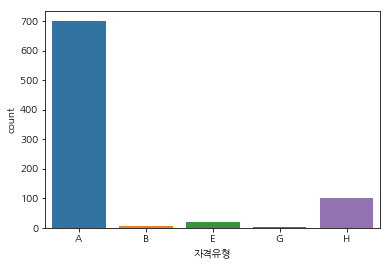

In [14]:
sns.countplot(국민임대[국민임대.전용면적<50].자격유형)

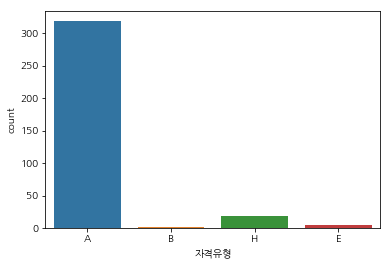

In [15]:
sns.countplot(국민임대[국민임대.전용면적>=50].자격유형)

- 전용면적 넘는 것으로 확정지어 보기는 힘든듯...ㅠㅠㅠ

- 유형별로 임대료랑 임대보증금을 보자아

# 행복주택

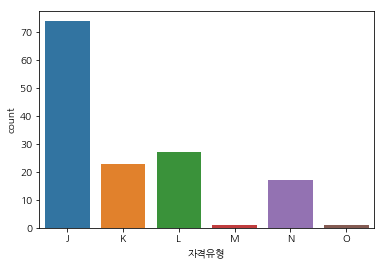

In [16]:
sns.countplot(행복주택.자격유형)

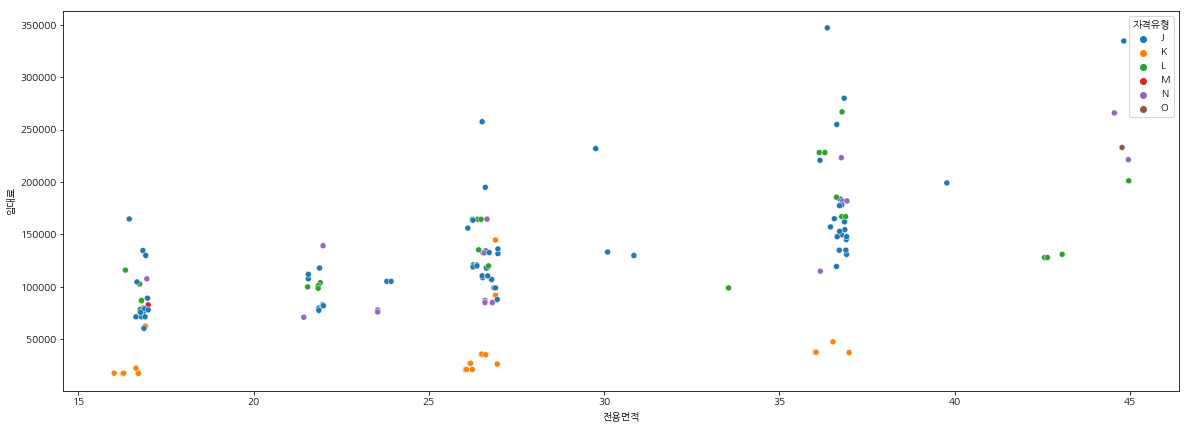

In [40]:
plt.subplots(figsize=(20,7))
sns.scatterplot(x="전용면적", y="임대료", data=행복주택, hue="자격유형")

In [56]:
pd.concat([round(행복주택.groupby(행복주택.자격유형).임대료.mean()), 
           round(행복주택.groupby(행복주택.자격유형).임대보증금.mean())], axis=1)

,임대료,임대보증금
자격유형,,
J,133680.0,29979919.0
K,37182.0,49140609.0
L,143423.0,30191889.0
M,82820.0,14616000.0
N,138119.0,27961294.0
O,233010.0,41120000.0


- J는 임대보증금 높은 편 --> 행복주택high
- K는 임대보증금이 확연히 높다. --> 행복주택high
- L도 임대보증금 높은 편 --> 행복주택high
- M은 둘다 낮다. --> 행복주택low
- N은 둘다 보통인데, J보다는 낮음 --> 행복주택low
- O는 둘다 높은편 --> 행복주택_high

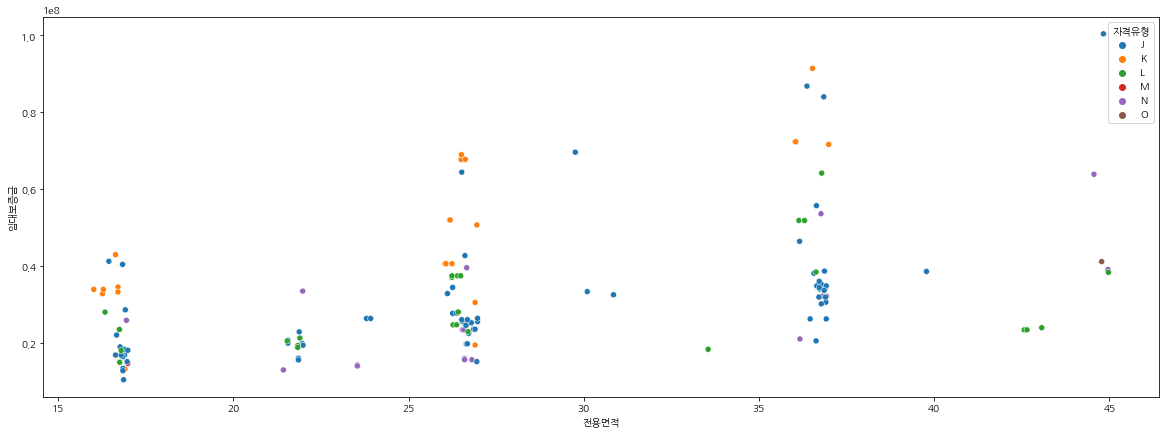

In [41]:
plt.subplots(figsize=(20,7))
sns.scatterplot(x="전용면적", y="임대보증금", data=행복주택, hue="자격유형")

# 국민임대

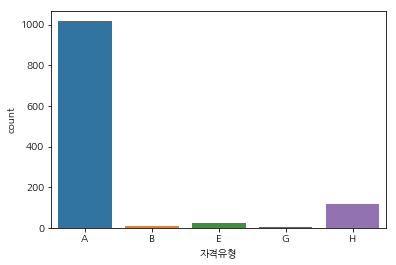

In [19]:
sns.countplot(국민임대.자격유형)

# A를 한번 빼고 볼까? 

In [20]:
국민임대_=국민임대[국민임대.자격유형!="A"]

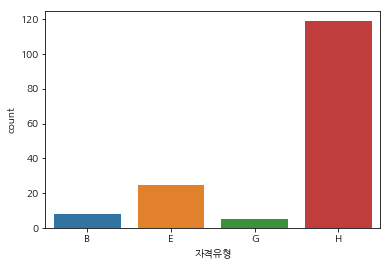

In [21]:
sns.countplot(국민임대_.자격유형)

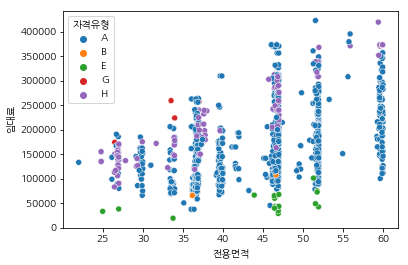

In [22]:
sns.scatterplot(x="전용면적", y="임대료", data=국민임대, hue="자격유형")

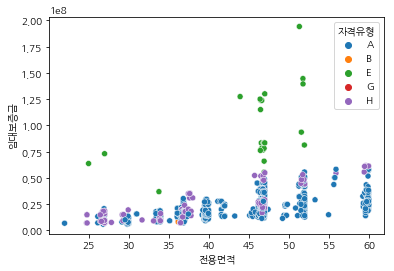

In [23]:
sns.scatterplot(x="전용면적", y="임대보증금", data=국민임대, hue="자격유형")

In [57]:
pd.concat([round(국민임대_.groupby(국민임대_.자격유형).임대료.mean()), 
           round(국민임대_.groupby(국민임대_.자격유형).임대보증금.mean())], axis=1)

,임대료,임대보증금
자격유형,,
B,141361.0,17242375.0
E,50215.0,96419360.0
G,234472.0,12820200.0
H,220478.0,26137720.0


- B: 임대료 임대보증금 둘다 중간 --> 국민임대low
- E: 임대료 아주 높음. --> 국민임대high
- H: 임대료 높고 임대보증금 높음--> 국민임대high
- G: 임대료 높은데 임대보증금 확연히 낮음, 전용면적도 낮은데에 살고 있음 --> 국민임대low

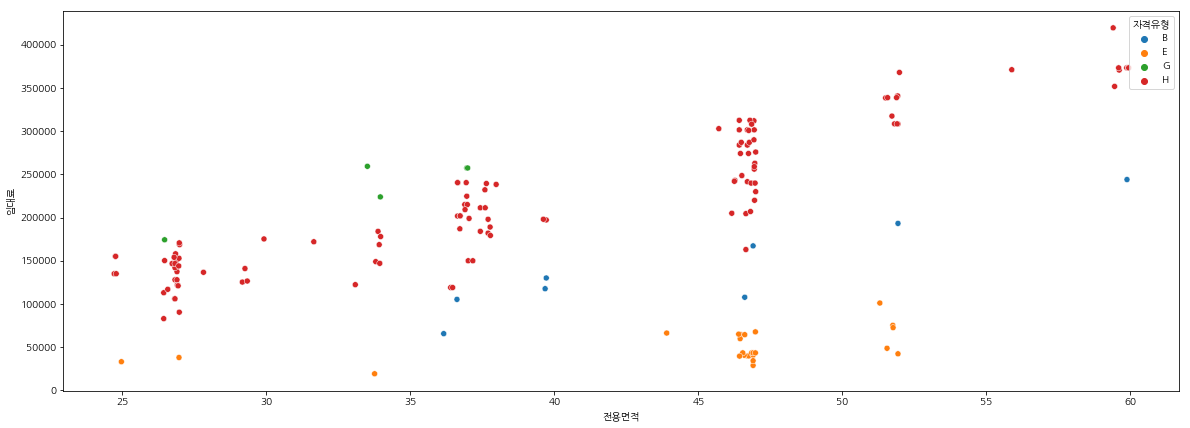

In [42]:
plt.subplots(figsize=(20,7))
sns.scatterplot(x="전용면적", y="임대료", data=국민임대_, hue="자격유형")

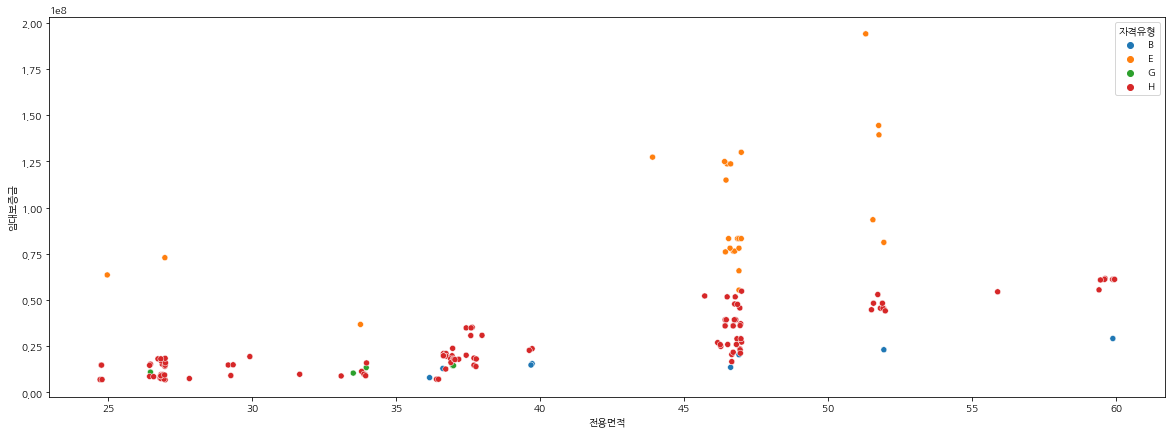

In [43]:
plt.subplots(figsize=(20,7))
sns.scatterplot(x="전용면적", y="임대보증금", data=국민임대_, hue="자격유형")

- 마찬가지로 임대보증금과 임대료에 따른 차이가 보인다.

# 영구임대

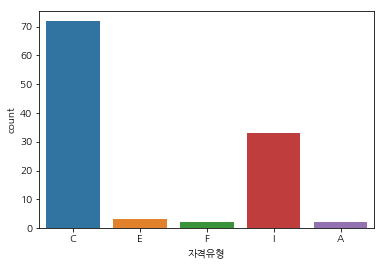

In [26]:
sns.countplot(영구임대.자격유형)

In [58]:
pd.concat([round(영구임대.groupby(영구임대.자격유형).임대료.mean()), 
           round(영구임대.groupby(영구임대.자격유형).임대보증금.mean())], axis=1)

,임대료,임대보증금
자격유형,,
A,162390.0,13533000.0
C,101468.0,6858208.0
E,22913.0,44005067.0
F,73575.0,4279000.0
I,80576.0,9375848.0


- E: 영구임대high
- C: 영구임대low
- F: 영구임대low
- I: 영구임대low

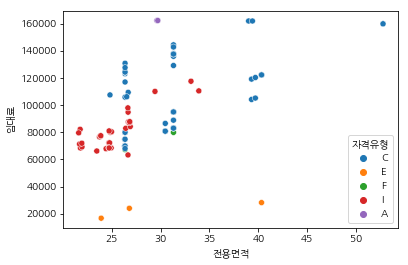

In [27]:
sns.scatterplot(x="전용면적", y="임대료", data=영구임대, hue="자격유형")

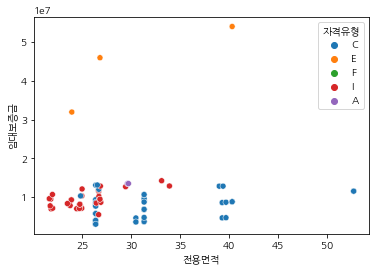

In [28]:
sns.scatterplot(x="전용면적", y="임대보증금", data=영구임대, hue="자격유형")

- 마찬가지로 임대료와 임대보증금 중 뭘 더 많이 내느냐의 차이. 
- 결국 같은 공급유형 안에서는 임대료, 임대보증금을 어떻게 냈냐에 따라 갈리고
- I같은 경우에는 특정 전용면적 이하에만 해당된다는 점이 특이점